In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Generate data

In [2]:
X, y = make_regression(n_samples=300,
                       n_features=1,
                       bias=10,
                       noise=8,
                       random_state=1)
print(X.shape, y.shape)

(300, 1) (300,)


# Plot data

In [3]:
def plot_data(X, y):
    plt.scatter(X, y, color='green')
    plt.xlabel("X")
    plt.ylabel('y')
    plt.title('Dataset')
    plt.show()

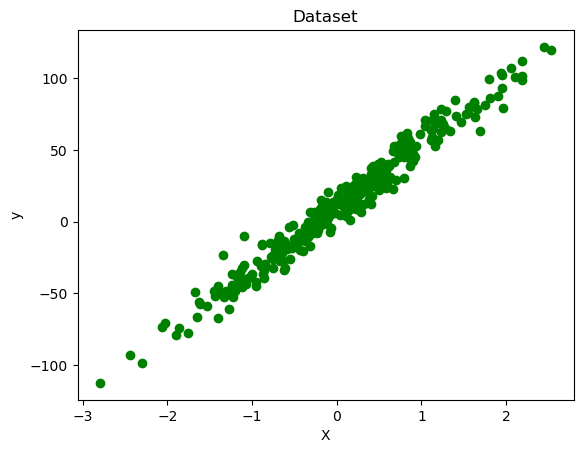

In [4]:
plot_data(X, y)

# Split data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

print(X_train.shape, X_test.shape) 

(240, 1) (60, 1)


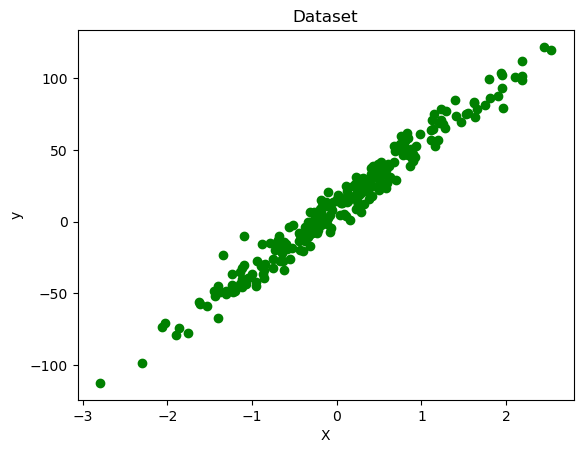

In [6]:
plot_data(X_train, y_train)

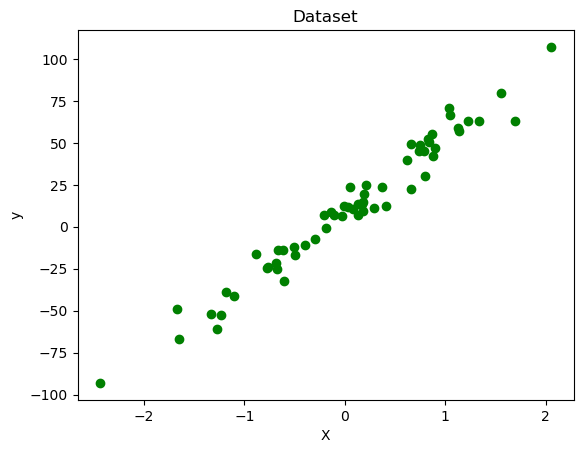

In [7]:
plot_data(X_test, y_test)

# Mean Model

In [8]:
train_pred = [y_train.mean() for _ in range(len(y_train))]
print("Train MSE: ", mean_squared_error(y_train, train_pred))

test_pred = [y_train.mean() for _ in range(len(y_test))]
print("Test MSE: ", mean_squared_error(y_test, test_pred))

Train MSE:  1843.3754916413527
Test MSE:  1633.1614493103946


# Custom KNN

In [9]:
class KNNRegressor:
    def __init__(self, n_neighbors=5):
        """KNN Regressor

        Args:
            n_neighbors (int, optional): Number of neighbors. Defaults to 5.
        """
        self.n_neighbors = n_neighbors

    def _euclidean_distance(self, X1, X2):
        """Computes euclidean distance.

        Args:
            X1 (array): Input 1
            X2 (array): Input 2

        Returns:
            float: Euclidean distance
        """
        X1 = np.array(X1)
        X2 = np.array(X2)
        return np.sqrt(np.mean((X1-X2)**2, axis=-1))
        
    def fit(self, X, y):
        """Fit

        Args:
            X (array): Features
            y (array): Target
        """
        self.X = X
        self.y = y

    def predict(self, X):
        """Predict

        Args:
            X (array): Features

        Returns:
            array: Predictions
        """
        # Simple way
        
        # y_pred = np.zeros(X.shape[0])
        # for idx, row in enumerate(X):
        #     # Compute distances and pick nearest neighbors
        #     neighbors_idx = np.argsort(
        #                     [self._euclidean_distance(row, pt) for pt in self.X]
        #                     )[:self.n_neighbors]
        #     neighbor_values = self.y[neighbors_idx]
        #     # Find the mean
        #     y_pred[idx] = np.mean(neighbor_values)
        
        # Optimized way
        
        # computes pairwise distance
        distances = cdist(X, self.X, metric='euclidean')
        # Find nearest neighbors 
        # To understand argpartition better,
        # refer https://stackoverflow.com/questions/52465066/how-does-numpys-argpartition-work-on-the-documentations-example
        neighbors_idx = np.argpartition(distances, self.n_neighbors)[:, :self.n_neighbors]
        neighbor_values = self.y[neighbors_idx]    
        y_pred = np.mean(neighbor_values, axis=1)
        
        return y_pred
 
    def score(self, X, y):
        """Predict and score

        Args:
            X (array): Features
            y (array): Target

        Returns:
            float: R^2 score
        """
        y_pred = self.predict(X)
        return r2_score(y, y_pred)


In [10]:
def plot_predictions(model, X, y, title):
    """Plot predictions

    Args:
        model : Model
        X : Features
        y : Target
        title : Plot title
    """
    plt.scatter(X, y, c='g', label='actual', alpha=0.5)
    plt.scatter(X, model.predict(X), c='r', alpha=0.5, label='predicted')
    plt.title(title)
    plt.legend()
    plt.show()

In [11]:
model1 = KNNRegressor(n_neighbors=5)
model1.fit(X_train, y_train)
print("Train R^2 score: ", model1.score(X_train, y_train))
print("Test R^2 score: ", model1.score(X_test, y_test))
print("-----------------------------------------------")
print("Train MSE: ", mean_squared_error(y_train, model1.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, model1.predict(X_test)))

Train R^2 score:  0.9736535157716306
Test R^2 score:  0.9584929520807085
-----------------------------------------------
Train MSE:  48.56646331749153
Test MSE:  67.69337654985998


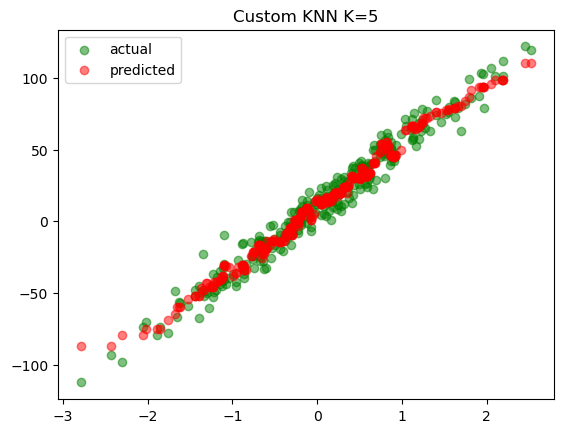

In [12]:
plot_predictions(model1, X, y, f"Custom KNN K={model1.n_neighbors}")

# Scikit-Learn API

In [13]:
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train, y_train)
print("Train R^2 score: ", model2.score(X_train, y_train))
print("Test R^2 score: ", model2.score(X_test, y_test))
print("-----------------------------------------------")
print("Train MSE: ", mean_squared_error(y_train, model2.predict(X_train)))
print("Test MSE: ", mean_squared_error(y_test, model2.predict(X_test)))

Train R^2 score:  0.9736535157716306
Test R^2 score:  0.9584929520807085
-----------------------------------------------
Train MSE:  48.56646331749154
Test MSE:  67.69337654985996


We can observe that we are getting same results in both custom implementation and sklearn implementation.

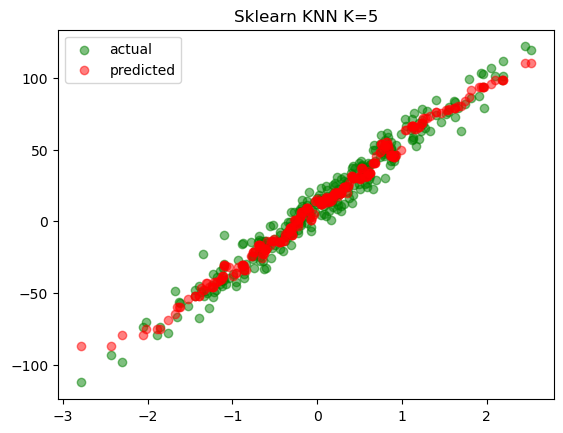

In [14]:
plot_predictions(model2, X, y, f"Sklearn KNN K={model2.n_neighbors}")

Do checkout my other kernels:

- [Linear Regression from scratch](https://www.kaggle.com/code/anilreddyvv/linear-regression-from-scratch)

- [Logistic Regression from scratch](https://www.kaggle.com/code/anilreddyvv/logistic-regression-from-scratch)

- [KNN Classification from scratch](https://www.kaggle.com/code/anilreddyvv/knn-classifier-from-scratch)

Follow for more implementations.